<a href="https://colab.research.google.com/github/aiswarya-180/Bank-Customer-Churn-Prediction/blob/main/EDA_Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

# Dataset description


| **Feature Name**           | **Description**                                                                                    |
| -------------------------- | -------------------------------------------------------------------------------------------------- |
| `CLIENTNUM`                | 🔐 **Customer ID** – A unique identifier assigned to each customer.                                |
| `Attrition_Flag`           | 🚪 **Attrition Indicator** – 1 if the customer left (account closed), 0 if they stayed.            |
| `Customer_Age`             | 🎂 **Age** – The age of the customer in full years.                                                |
| `Gender`                   | 🚻 **Gender** – Encoded as 'M' for Male, 'F' for Female.                                           |
| `Dependent_count`          | 👶 **Dependents** – Number of people financially dependent on the customer.                        |
| `Education_Level`          | 🎓 **Education** – The highest level of education attained (e.g., High School, Graduate).          |
| `Marital_Status`           | 💍 **Marital Status** – Relationship status (Married, Single, Divorced, Unknown).                  |
| `Income_Category`          | 💰 **Income Bracket** – Annual income grouped into ranges like `<40K`, `40K–60K`, etc.             |
| `Card_Category`            | 💳 **Card Type** – Type of credit card issued (Blue, Silver, Gold, Platinum).                      |
| `Months_on_book`           | 📘 **Tenure** – Number of months the customer has been with the bank.                              |
| `Total_Relationship_Count` | 🔗 **Product Count** – Number of products (accounts/services) the customer uses.                   |
| `Months_Inactive_12_mon`   | 💤 **Inactivity (12M)** – Months the customer was inactive in the last year.                       |
| `Contacts_Count_12_mon`    | 📞 **Customer Contacts (12M)** – Number of times the customer contacted the bank in the last year. |
| `Credit_Limit`             | 🏦 **Credit Limit** – The total maximum credit assigned to the customer.                           |
| `Total_Revolving_Bal`      | 🔄 **Revolving Balance** – Current unpaid balance on the card.                                     |
| `Avg_Open_To_Buy`          | 🔓 **Open-to-Buy** – Average credit available for new purchases over the last 12 months.           |
| `Total_Amt_Chng_Q4_Q1`     | 📈 **Spending Change (Q4 vs Q1)** – How the transaction **amount** changed between Q1 and Q4.      |
| `Total_Trans_Amt`          | 💸 **Annual Spend** – Total transaction amount in the last 12 months.                              |
| `Total_Trans_Ct`           | 🔢 **Annual Transaction Count** – Total number of transactions in the past year.                   |
| `Total_Ct_Chng_Q4_Q1`      | 🔄 **Transaction Count Change (Q4 vs Q1)** – Change in transaction **count** from Q1 to Q4.        |
| `Avg_Utilization_Ratio`    | 📊 **Utilization Ratio** – Average ratio of credit used to the credit limit.                       |


In [ ]:
# mount google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# imports
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MRP/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df = df.iloc[:,:-2]
df.head().T

,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21


# EDA





## Basic Info and Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [ ]:
df.shape

(10127, 21)

In [ ]:
df.nunique()

,0
CLIENTNUM,10127
Attrition_Flag,2
Customer_Age,45
Gender,2
Dependent_count,6
Education_Level,7
Marital_Status,4
Income_Category,6
Card_Category,4
Months_on_book,44


In [ ]:
df = df.drop(columns=['CLIENTNUM'])

In [ ]:
df.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


**There are no missing values present**

In [ ]:
df.duplicated().sum()

np.int64(0)

Attrition_Flag → use Label Encoding

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df['Attrition_Flag'].value_counts(normalize=True)

,proportion
Attrition_Flag,
0,0.83934
1,0.16066


**Converts Attrition_Flag from text labels to binary values: 1 for "Attrited Customer", 0 for "Existing Customer".**

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Count of categorical columns
num_categorical = len(categorical_cols)

# Display results
print(f"Number of categorical columns: {num_categorical}")
print("Categorical columns:", list(categorical_cols))

Number of categorical columns: 4
Categorical columns: ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


## Univariate Analysis

### Numeric Variables

In [ ]:
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.0,0.000,0.000,0.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Gender,10127.0,0.470919,0.499178,0.0,0.000,0.000,1.000,1.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000


In [ ]:

discrete_features = [col for col in numeric_cols if df[col].nunique() < 25]
continuous_features = [col for col in numeric_cols if col not in discrete_features]

print("Number of Numerical features:", len(numeric_cols))
print("Number of Discrete features:", len(discrete_features),discrete_features)
print("Number of Continuous features:", len(continuous_features),continuous_features)


Number of Numerical features: 16
Number of Discrete features: 6 ['Attrition_Flag', 'Gender', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
Number of Continuous features: 10 ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


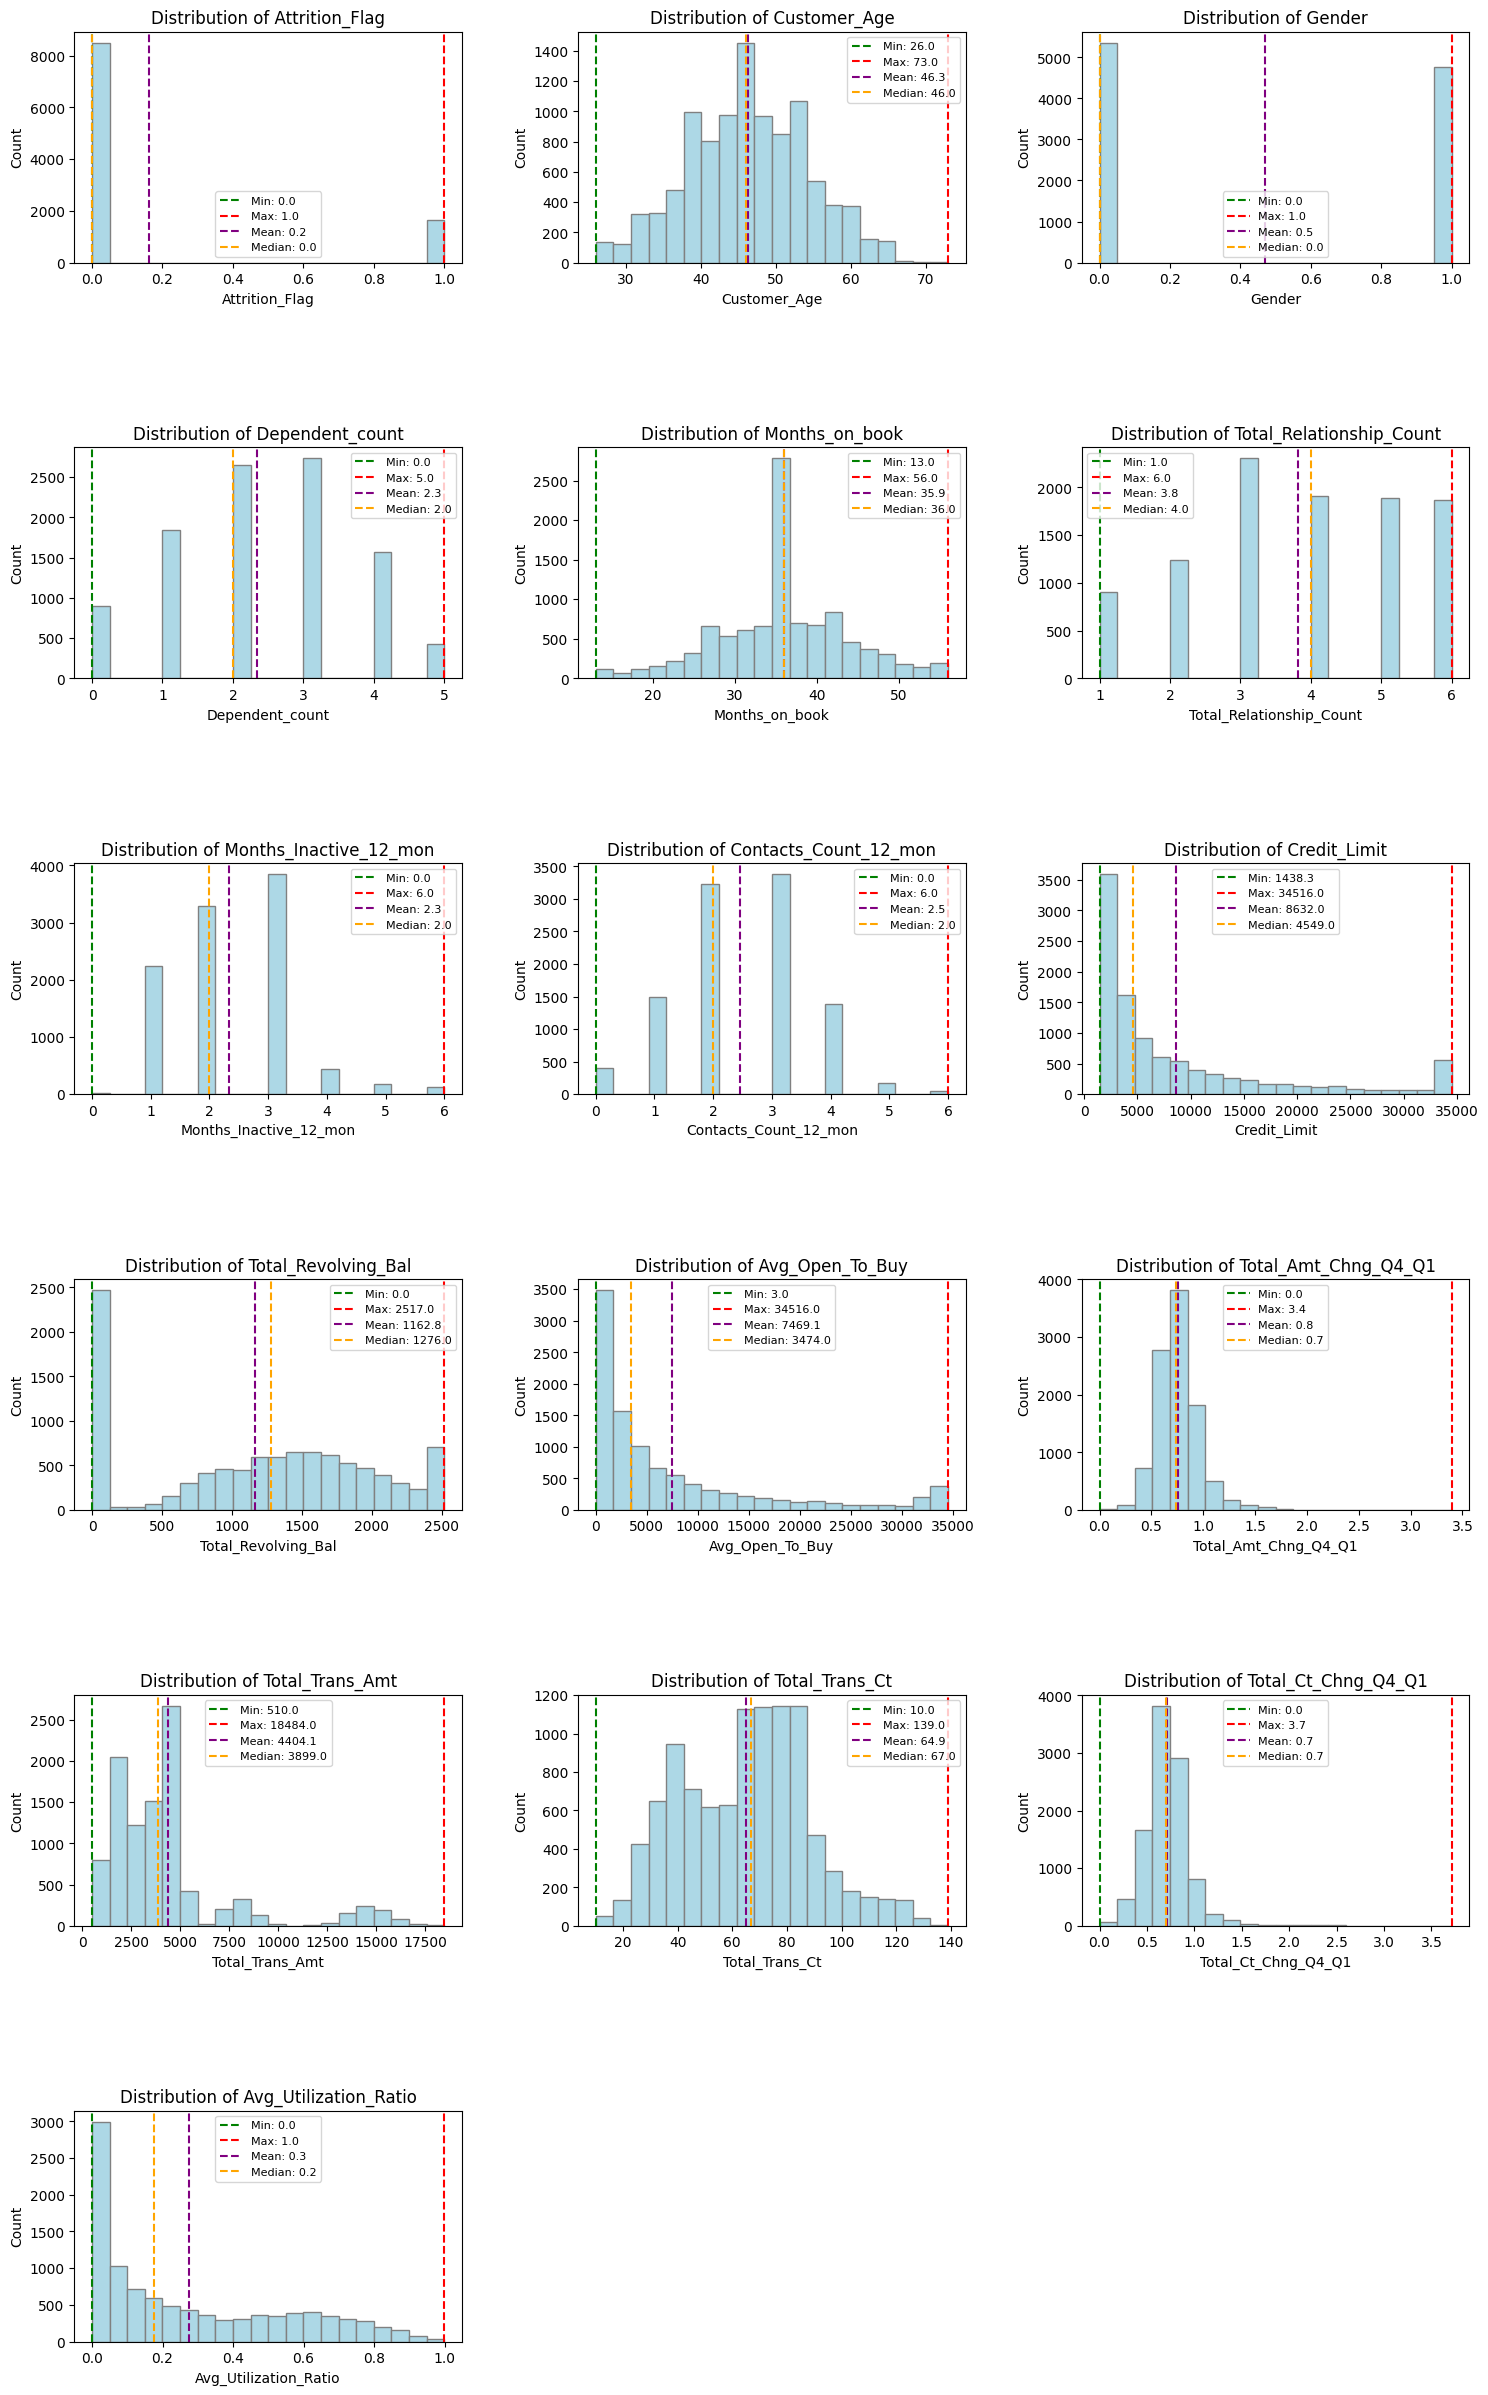

In [ ]:

# Define number of columns and calculate rows
cols = 3
rows = (len(numeric_cols) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    counts, bins, _ = ax.hist(df[col], bins=20, edgecolor='grey', color='#ADD8E6')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # Draw vertical lines for statistics
    ax.axvline(df[col].min(), color='green', linestyle='--', label=f'Min: {df[col].min():.1f}')
    ax.axvline(df[col].max(), color='red', linestyle='--', label=f'Max: {df[col].max():.1f}')
    ax.axvline(df[col].mean(), color='purple', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='orange', linestyle='--', label=f'Median: {df[col].median():.1f}')
    ax.legend(fontsize=8)

# Remove extra subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()


### Categorical Variables

In [ ]:
# unique values
for col in categorical_cols:
    print(col, df[col].unique())
    print("-"*50)

Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
--------------------------------------------------
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
--------------------------------------------------
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
--------------------------------------------------
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']
--------------------------------------------------


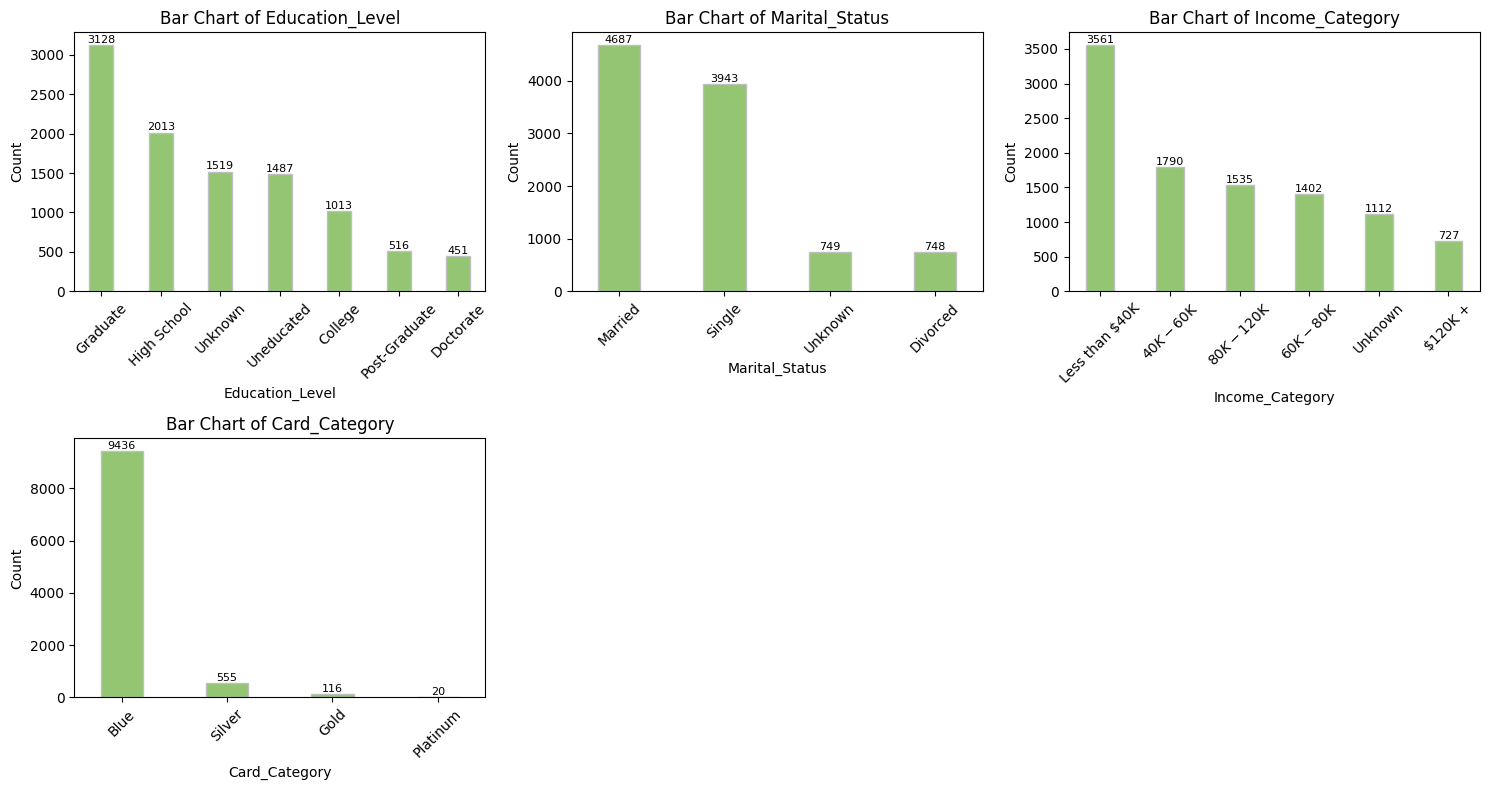

In [ ]:
# Set the number of columns per row in the grid
cols = 3
rows = (len(categorical_cols) + cols - 1) // cols  # ceiling division for rows

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  # adjust figure size as needed
axes = axes.flatten()  # flatten 2D array of axes to 1D for easy iteration

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    ax = axes[idx]
    value_counts.plot(kind='bar', ax=ax, edgecolor='silver', color='#93C572', width=0.4)
    ax.set_title(f'Bar Chart of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    # Add value labels
    for i, count in enumerate(value_counts):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
df.Attrition_Flag.value_counts()

,count
Attrition_Flag,
0,8500
1,1627


## Bivariate Analysis

In [ ]:

card_categories = df['Card_Category'].unique()
num_cards = len(card_categories)

# Define subplot layout (e.g., 2 per row)
cols = 2
rows = (num_cards + cols - 1) // cols

# Create subplot figure
fig = make_subplots(rows=rows, cols=cols,
                    specs=[[{'type': 'domain'}]*cols for _ in range(rows)],
                    subplot_titles=[f"{card} Card" for card in card_categories])

# Add donut charts
for i, card in enumerate(card_categories):
    row = i // cols + 1
    col = i % cols + 1

    subset = df[df['Card_Category'] == card]
    gender_counts = subset['Gender'].value_counts().reset_index()
    gender_counts.columns = ['Gender', 'Count']

    fig.add_trace(go.Pie(
        labels=gender_counts['Gender'],
        values=gender_counts['Count'],
        hole=0.4,
        marker=dict(colors=px.colors.qualitative.Set2),
        textinfo='percent+label',
    ), row=row, col=col)

# Update layout
fig.update_layout(
    title_text='Gender Distribution by Card Category',
    height=300 * rows,
    showlegend=False
)

fig.show()


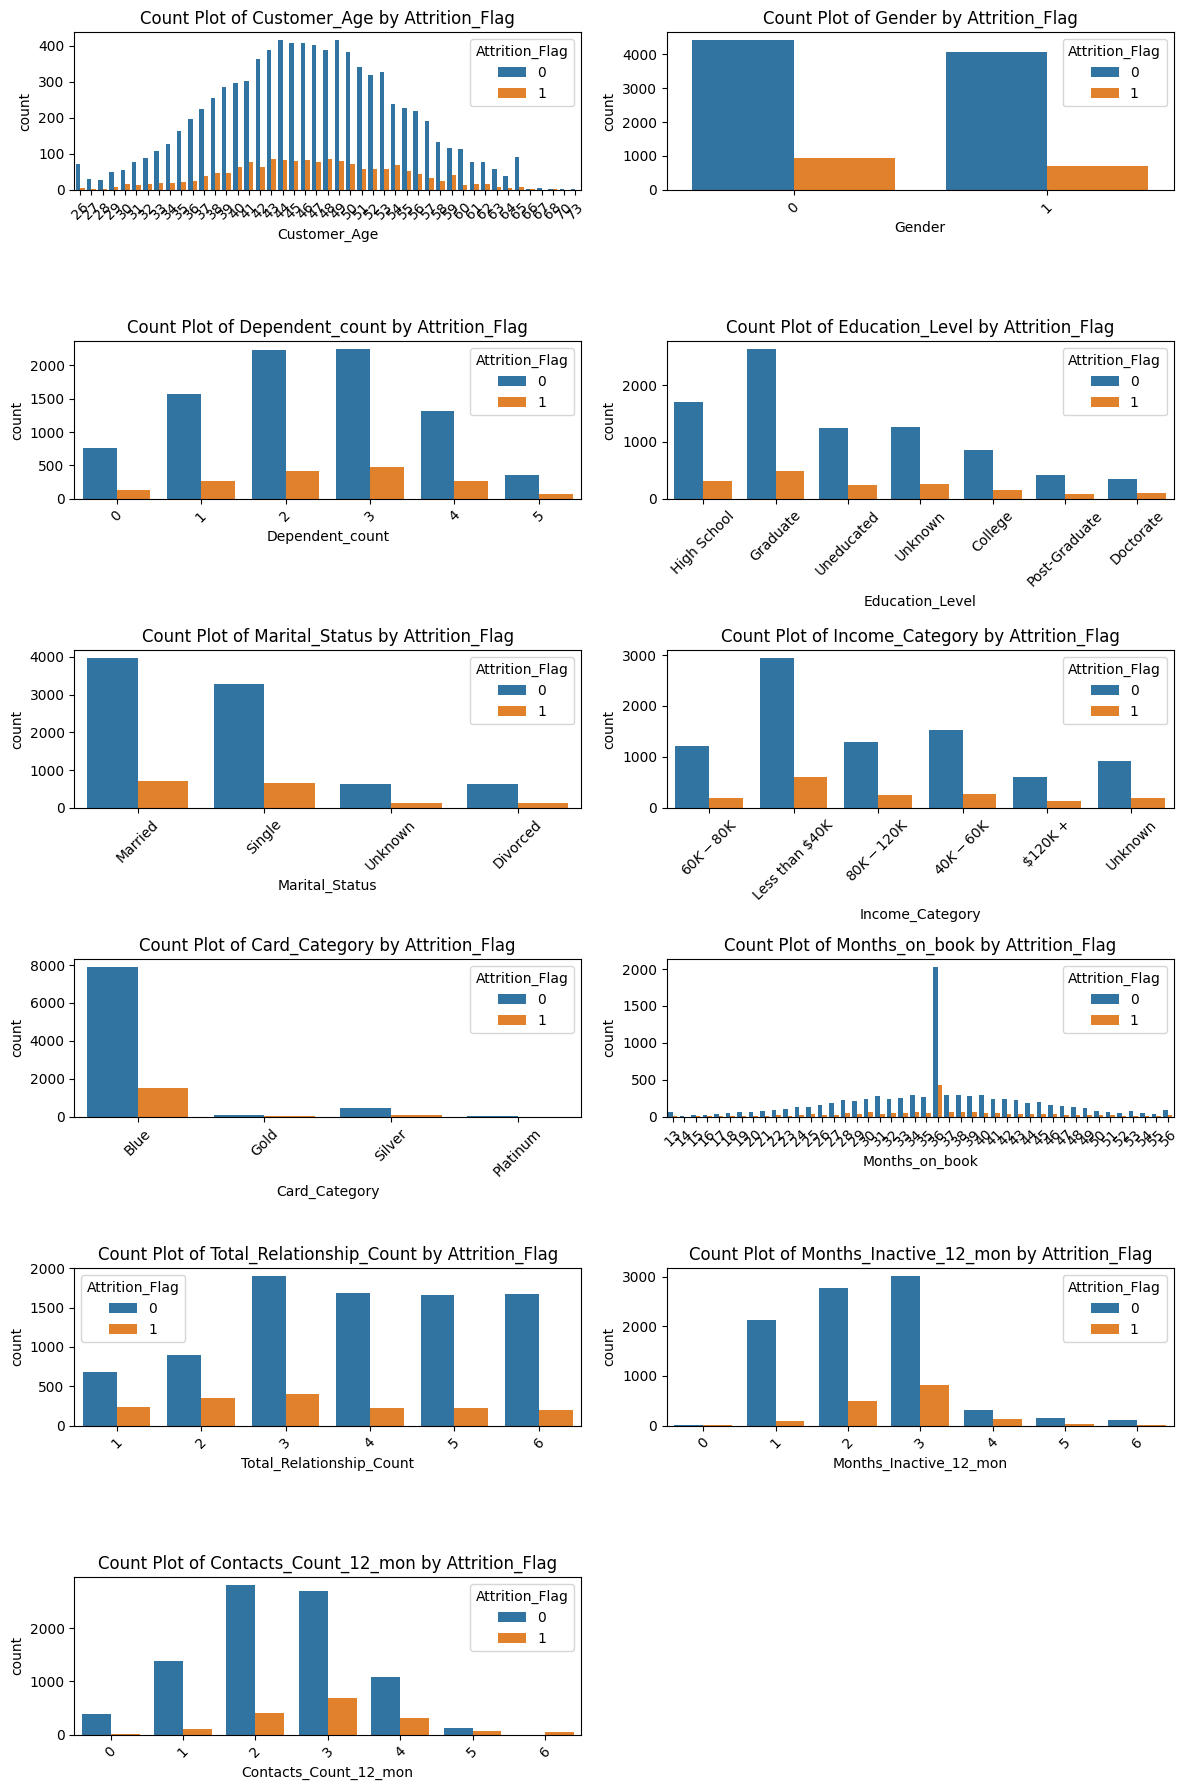

In [ ]:

exclude_cols = [
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# List of columns to plot (excluding those in exclude_cols and 'Attrition_Flag')
cols_to_plot = [col for col in df.columns if col not in exclude_cols + ['Attrition_Flag']]

# Determine the grid size
n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()  # Flatten to easily iterate

for ax, predictor in zip(axes, cols_to_plot):
    sns.countplot(data=df, x=predictor, hue='Attrition_Flag', ax=ax)
    ax.set_title(f'Count Plot of {predictor} by Attrition_Flag')
    ax.tick_params(axis='x', rotation=45)

# If you have more subplot axes than predictors, remove the extra axes
for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Multivariate Analysis

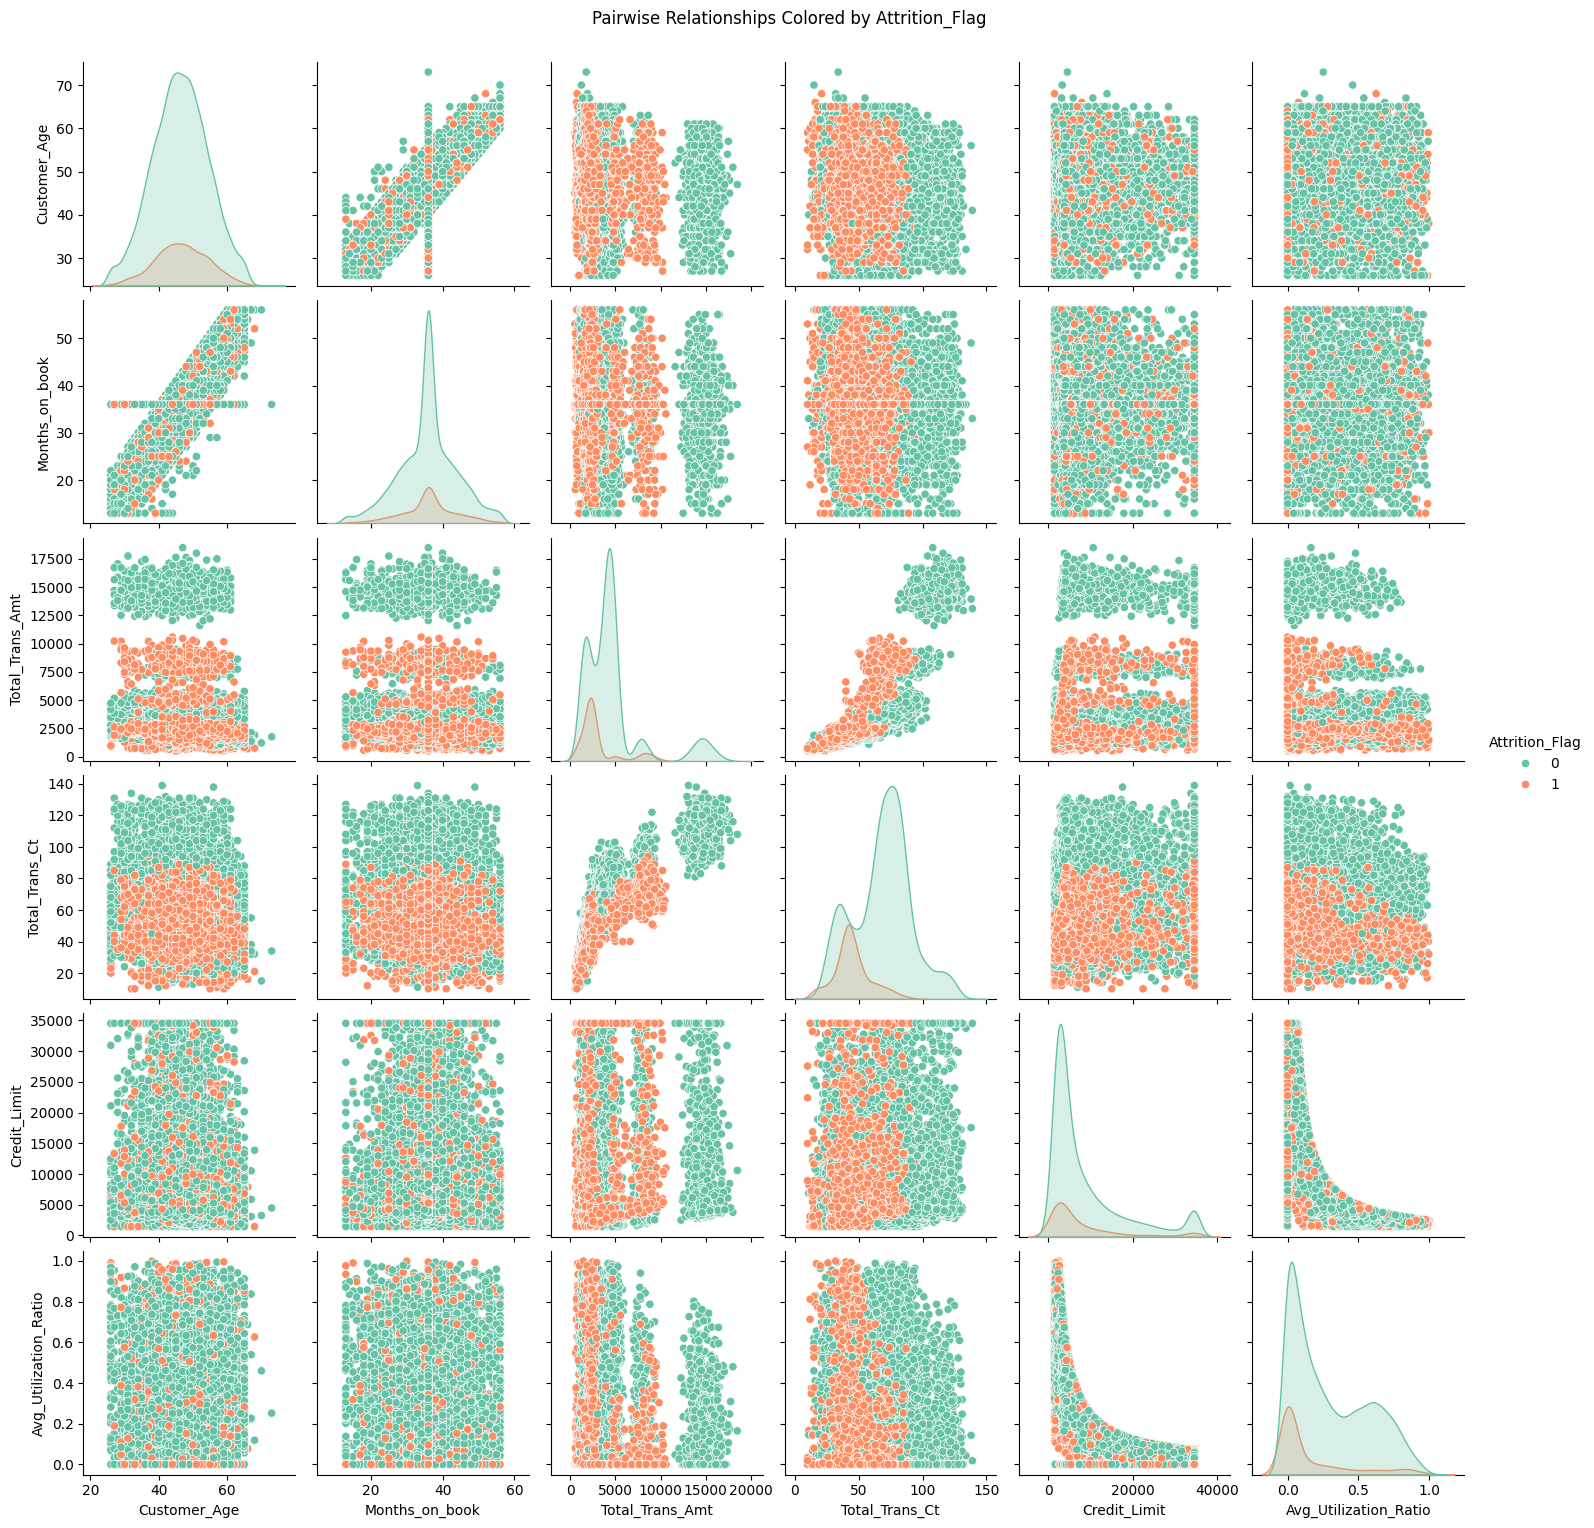

In [ ]:
# Selected numerical variables and target
selected_cols = ['Customer_Age', 'Months_on_book', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Attrition_Flag']

sns.pairplot(df[selected_cols], hue='Attrition_Flag', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships Colored by Attrition_Flag", y=1.02)
plt.show()


##Detect Outliers

In [ ]:
outlier_indices = {}

# Exclude 'Attrition_Flag' from numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'Attrition_Flag']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices[col] = outliers.index.tolist()

# Create a table to display the results
total_rows = len(df)
outlier_data = []

for col, indices in outlier_indices.items():
    count = len(indices)
    percentage = (count / total_rows) * 100
    outlier_data.append({
        'Column': col,
        'Outlier Count': count,
        'Outlier %': f"{percentage:.2f}%"
    })

# Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_data)
print(outlier_df.to_string(index=False))


                  Column  Outlier Count Outlier %
            Customer_Age              2     0.02%
                  Gender              0     0.00%
         Dependent_count              0     0.00%
          Months_on_book            386     3.81%
Total_Relationship_Count              0     0.00%
  Months_Inactive_12_mon            331     3.27%
   Contacts_Count_12_mon            629     6.21%
            Credit_Limit            984     9.72%
     Total_Revolving_Bal              0     0.00%
         Avg_Open_To_Buy            963     9.51%
    Total_Amt_Chng_Q4_Q1            396     3.91%
         Total_Trans_Amt            896     8.85%
          Total_Trans_Ct              2     0.02%
     Total_Ct_Chng_Q4_Q1            394     3.89%
   Avg_Utilization_Ratio              0     0.00%


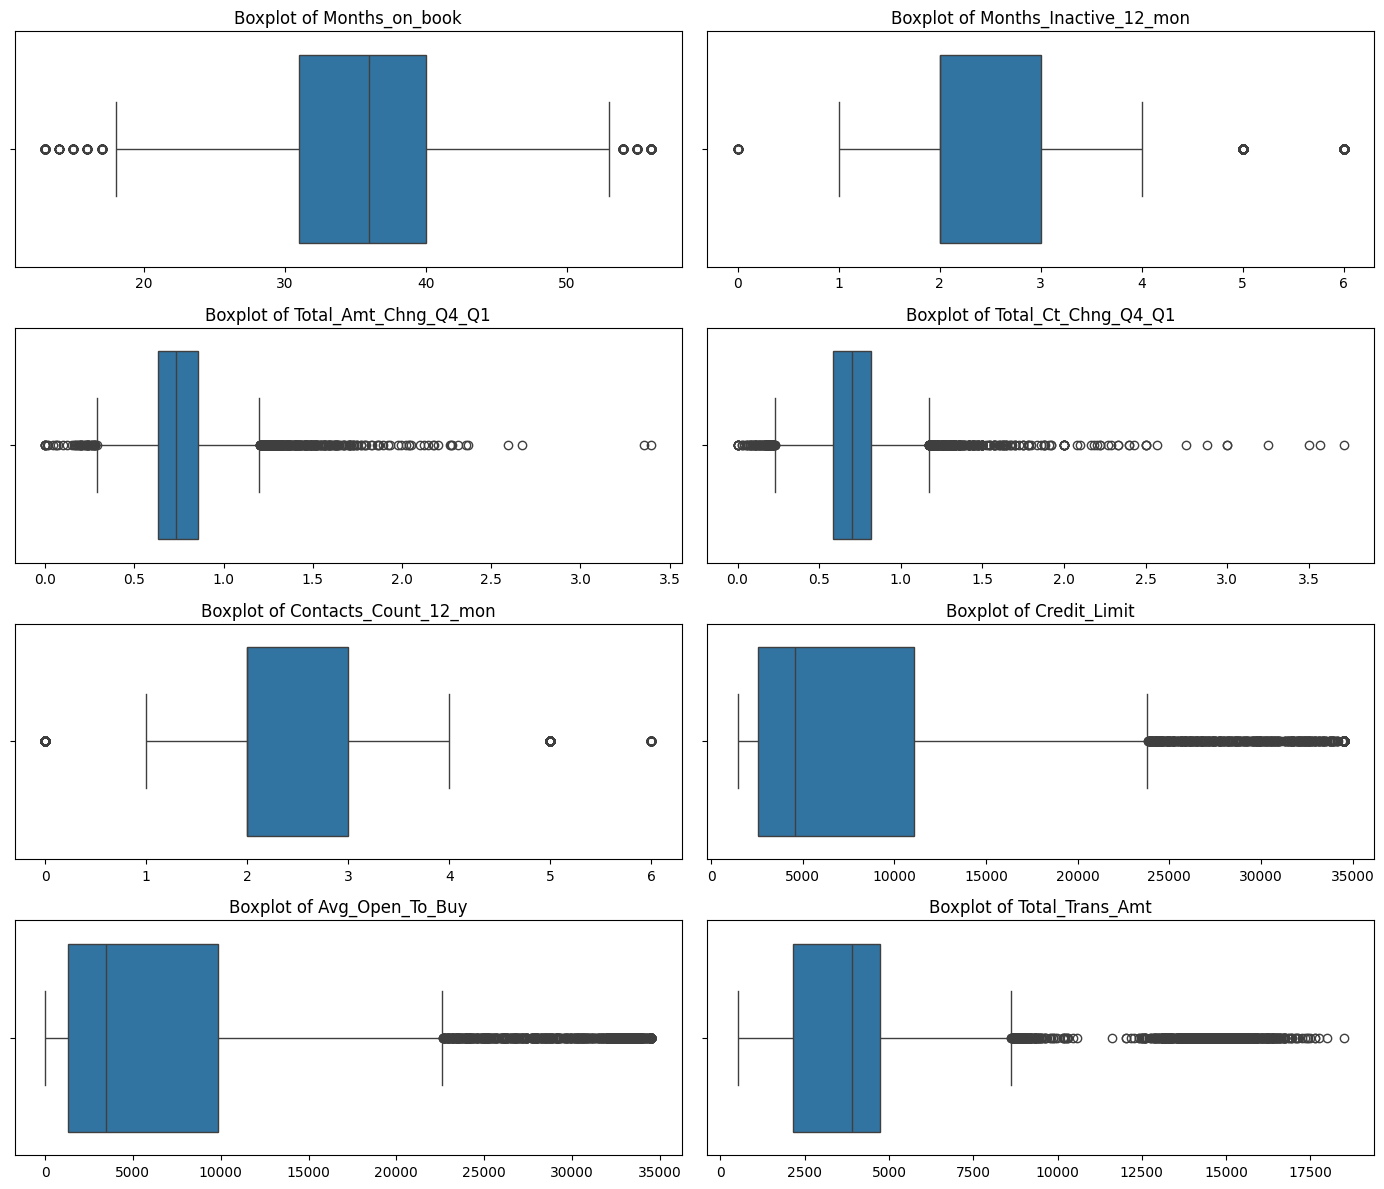

In [ ]:
cols_to_check = [
    'Months_on_book', 'Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Avg_Open_To_Buy', 'Total_Trans_Amt'
]

# Set up subplot grid: 4 rows × 2 columns = 8 plots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.flatten()  # flatten to easily iterate over 1D

for i, col in enumerate(cols_to_check):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


## Pearson Correlation

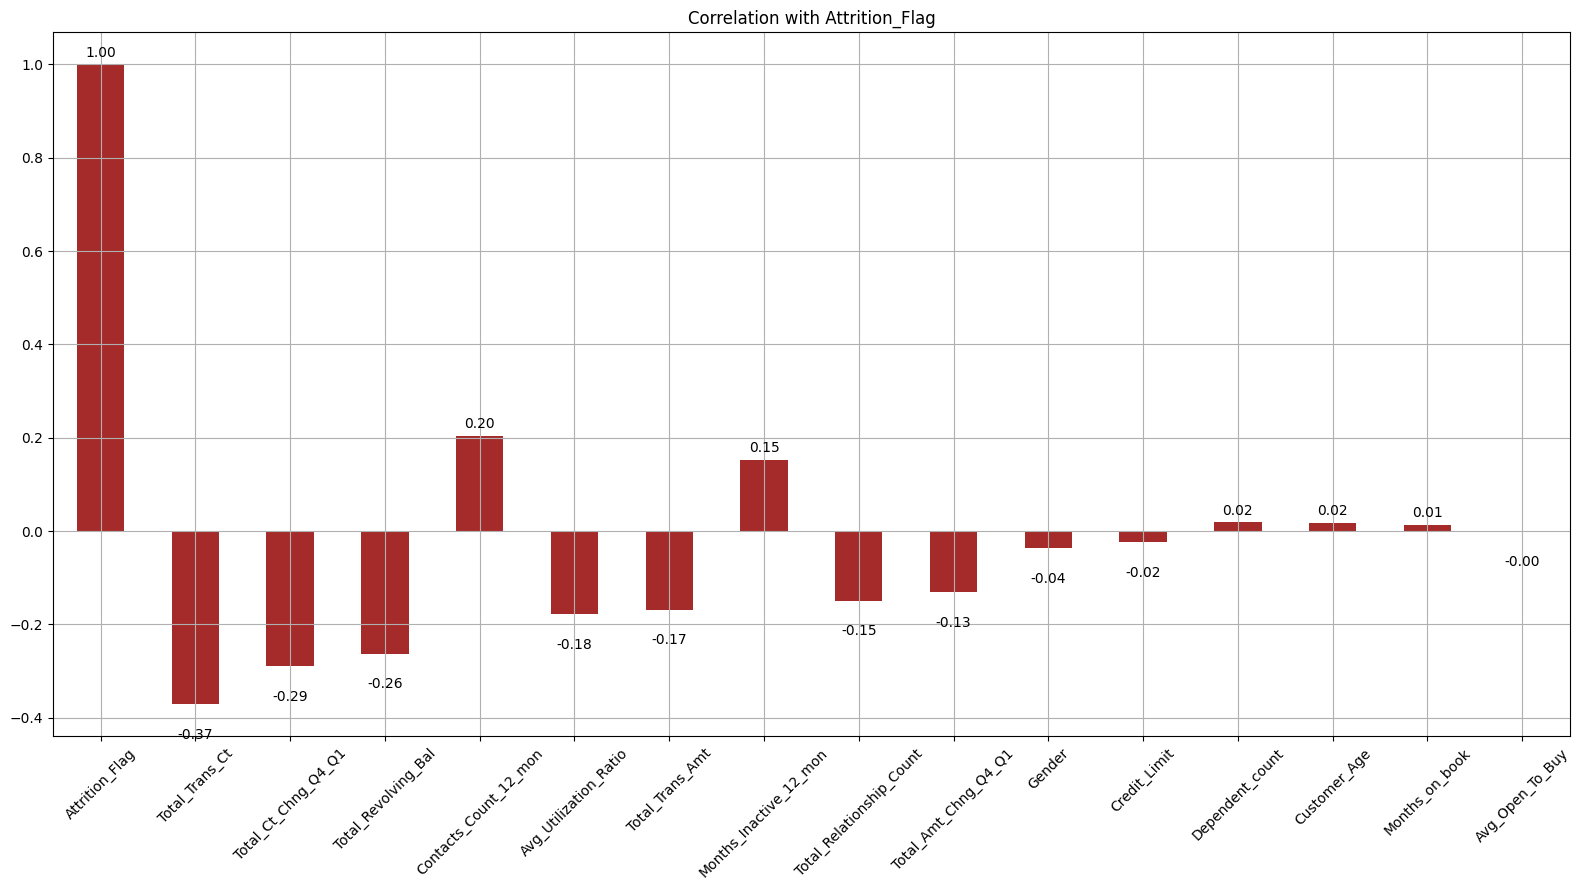

In [ ]:

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute correlations
# correlations = df_numeric.corrwith(df['Attrition_Flag'])
correlations = df_numeric.corr()['Attrition_Flag'].sort_values(key=abs, ascending=False)

# Plot bar chart
ax = correlations.plot.bar(
    figsize=(16, 9),
    title='Correlation with Attrition_Flag',
    rot=45,
    grid=True,
    color='brown'
)

# Add text labels on top of bars
for i, val in enumerate(correlations):
    plt.text(i, val + 0.01 if val > 0 else val - 0.05, f"{val:.2f}", ha='center', va='bottom' if val > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()



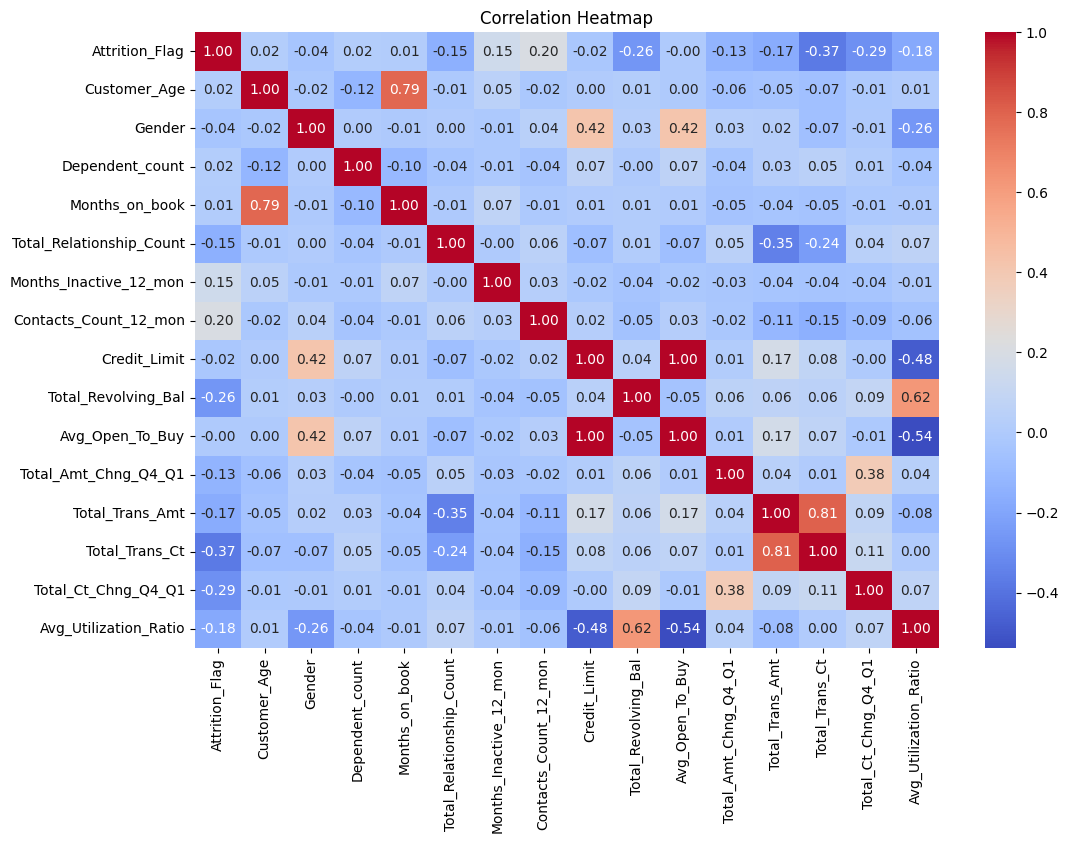

In [ ]:
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.to_csv('/content/drive/My Drive/MRP/after_EDA.csv', index=False)